In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
y=cars['price']
X=cars.drop(columns=['price'])

In [4]:
X=pd.get_dummies(X)

In [5]:
X.shape

(201, 37)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

**Set aside some data for testing**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)


In [19]:
model=RandomForestRegressor()
params_grid=[{'n_estimators':[10,20,30],'max_depth':[2,3,4]}]

In [20]:
grid_search=GridSearchCV(model,params_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 3, 4],
                          'n_estimators': [10, 20, 30]}])

In [21]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.8361772467279962 {'max_depth': 2, 'n_estimators': 10}
0.8320222585199872 {'max_depth': 2, 'n_estimators': 20}
0.8295776535522655 {'max_depth': 2, 'n_estimators': 30}
0.8198113892026878 {'max_depth': 3, 'n_estimators': 10}
0.8326232623513949 {'max_depth': 3, 'n_estimators': 20}
0.8479513214167522 {'max_depth': 3, 'n_estimators': 30}
0.8065789398241195 {'max_depth': 4, 'n_estimators': 10}
0.8398351981647927 {'max_depth': 4, 'n_estimators': 20}
0.8229384243167465 {'max_depth': 4, 'n_estimators': 30}


In [22]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 30}

In [23]:
grid_search.best_score_

0.8479513214167522

In [24]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=3, n_estimators=30)

**Build model with best estimator**

In [25]:
model = grid_search.best_estimator_

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [28]:
r2_score(y_test,y_pred)

0.9291307092284495

In [29]:
np.sqrt(mse)

2499.763936062209

<AxesSubplot:ylabel='price'>

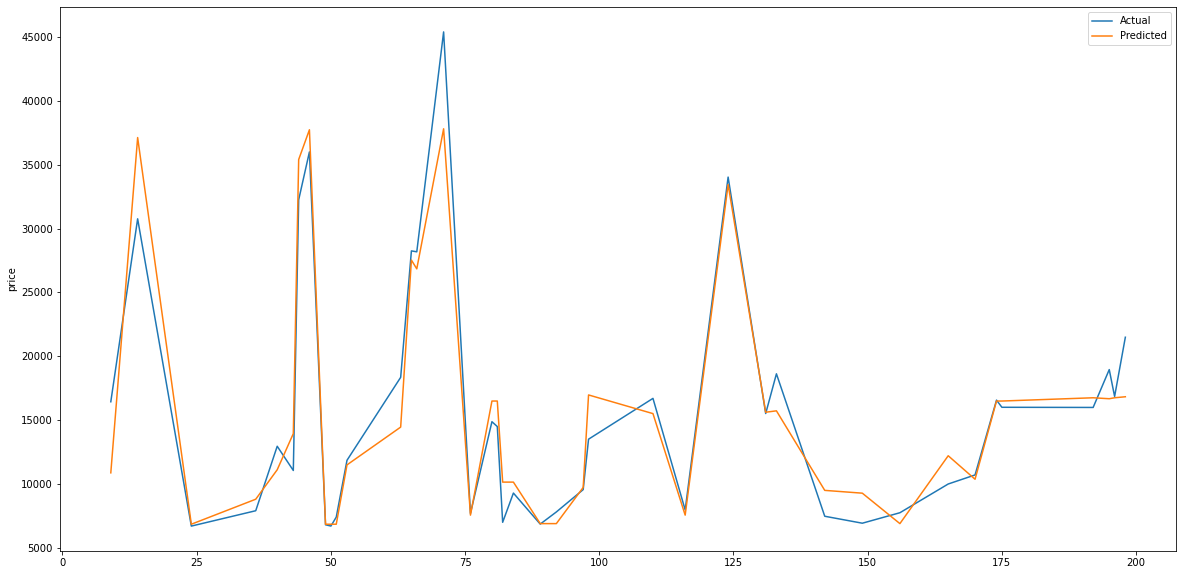

In [30]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")